In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
df = pd.read_csv("/content/Admission_Predict_Ver1.1.csv")

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [ ]:
df.nunique()

,0
Serial No.,500
GRE Score,49
TOEFL Score,29
University Rating,5
SOP,9
LOR,9
CGPA,184
Research,2
Chance of Admit,61


In [ ]:
df.drop(columns="Serial No.",inplace=True,axis=1)

In [ ]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

# EDA

In [ ]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


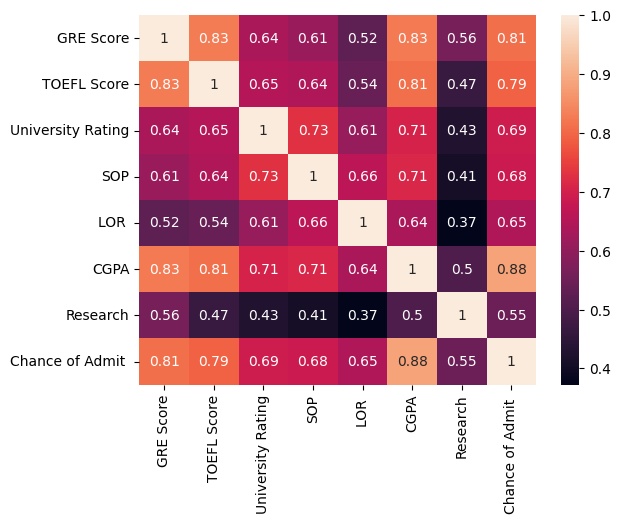

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

<Axes: >

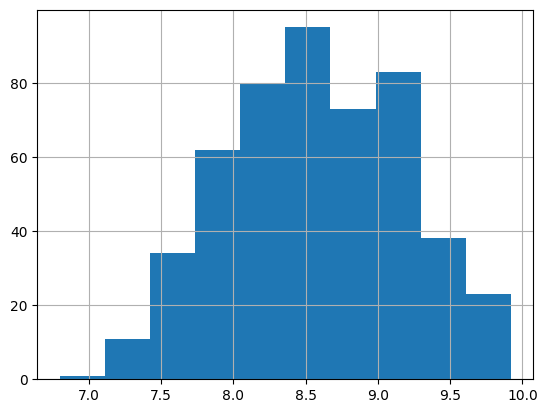

In [ ]:
df["CGPA"].hist()

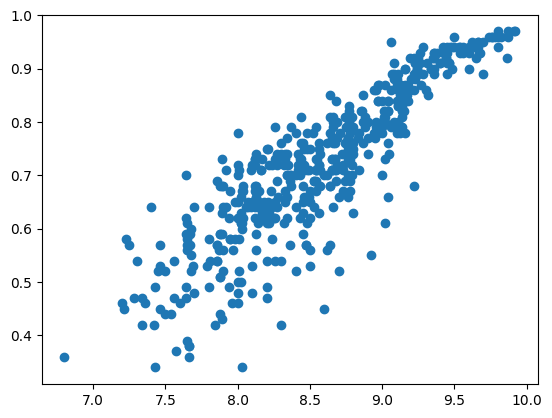

In [ ]:
plt.scatter(df["CGPA"],df["Chance of Admit "])

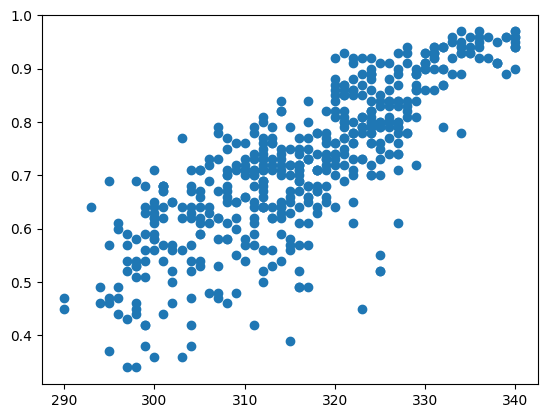

In [ ]:
plt.scatter(df["GRE Score"],df["Chance of Admit "])

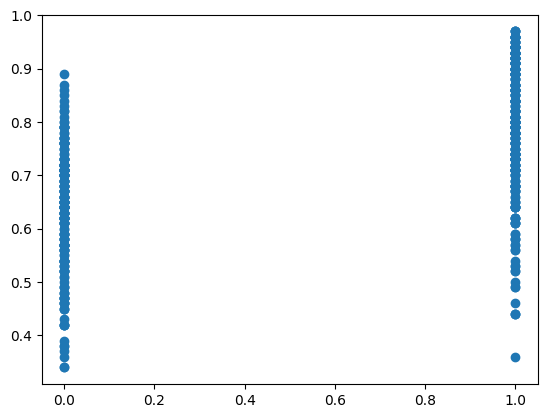

In [ ]:
plt.scatter(df["Research"],df["Chance of Admit "])

# Model training

In [ ]:
# df = df[['GRE Score', 'TOEFL Score','CGPA',"Chance of Admit "]]
X = df.drop(columns = ["Chance of Admit "])
y = df["Chance of Admit "]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 7)
(100, 7)
(400,)
(100,)


In [ ]:
model = LinearRegression()

In [ ]:
hist = model.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
result = pd.DataFrame({"Y test":y_test,"Y pred":y_pred})
result.head()

,Y test,Y pred
361,0.93,0.914575
73,0.84,0.795181
374,0.39,0.572660
155,0.77,0.707370
104,0.74,0.815883


In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.042722654277053636

## Scaling data

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
ms_scaler = MinMaxScaler((0,1))
ss_scaler = StandardScaler()

scaled_X_train = ms_scaler.fit_transform(X_train)
scaled_X_test = ms_scaler.transform(X_test)

scaled_X_train = ss_scaler.fit_transform(scaled_X_train)
scaled_X_test = ss_scaler.transform(scaled_X_test)

In [ ]:
model = LinearRegression()
hist = model.fit(scaled_X_train,y_train)
y_pred = model.predict(scaled_X_test)
result = pd.DataFrame({"Y test":y_test,"Y pred":y_pred})
result.head()

,Y test,Y pred
361,0.93,0.914575
73,0.84,0.795181
374,0.39,0.572660
155,0.77,0.707370
104,0.74,0.815883


In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

0.0427226542770537

In [ ]:
metrics.mean_squared_error(y_test,y_pred)

0.0037046553987884123

In [ ]:
metrics.r2_score(y_test,y_pred)

0.8188432567829628